# Práctica 2 - Segmentación

### Patricia Córdoba Hidalgo

Importamos las librerías que usaremos

In [2]:
import pandas as pd
import numpy as np
from pract2_utils import * 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [3]:
datos = pd.read_csv("accidentes_2013.csv", na_values=["?"]) # Leemos los datos del csv

In [4]:
def grafica(data, label, title, xlab, ylab):
    plt.plot(data,label, c='b')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    plt.show()

def graf_barras(data, label, title, xlab, ylab):
    fig, ax = plt.subplots()
    ax.bar(data, label, color='lime')
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

## Escenario 1: Choque frontal en carretera convencional 

### Selección de datos

Estudiaremos los datos que representen choques frontales en carreteras convencionales. 

In [5]:
# Seleccionamos los datos con los que trabajaremos
caso1 = datos[datos.TIPO_VIA == 'VÍA CONVENCIONAL']
caso1 = caso1[caso1.TIPO_ACCIDENTE == 'Colisión de vehículos en marcha (Frontal)']
caso1.head()

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
75,4,19.0,4,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.0,...,NaN,MOJADA,CREPÚSCULO,LLUVIA FUERTE,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
132,12,21.0,7,Girona,Cataluña,NO_ES_ISLA,3,3,0,0.0,...,SEÑAL DE STOP,MOJADA,NOCHE: SIN ILUMINACIÓN,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
139,5,15.0,5,Girona,Cataluña,NO_ES_ISLA,1,1,0,0.0,...,NaN,MOJADA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
146,12,3.0,7,Lleida,Cataluña,NO_ES_ISLA,3,3,0,0.0,...,NaN,SECA Y LIMPIA,NOCHE: SIN ILUMINACIÓN,BUEN TIEMPO,DESLUMBRAMIENTO,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
150,3,15.0,6,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.0,...,NaN,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN


In [6]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [7]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso1 = caso1[atributos]
caso1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 75 to 88793
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              1448 non-null   int64
 1   TOT_MUERTOS               1448 non-null   int64
 2   TOT_HERIDOS_GRAVES        1448 non-null   int64
 3   TOT_HERIDOS_LEVES         1448 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  1448 non-null   int64
dtypes: int64(5)
memory usage: 67.9 KB


### Normalización de los datos

In [8]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso1_norm = scaler.fit_transform(caso1)
caso1_norm[:5]

array([[0.06666667, 0.        , 0.        , 0.14285714, 0.2       ],
       [0.13333333, 0.        , 0.        , 0.21428571, 0.2       ],
       [0.        , 0.        , 0.        , 0.07142857, 0.2       ],
       [0.13333333, 0.        , 0.4       , 0.07142857, 0.2       ],
       [0.06666667, 0.        , 0.        , 0.14285714, 0.2       ]])

### Algoritmos de clustering

#### K-Means

Seleccionamos el número de clusters a usar.

In [9]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso1_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

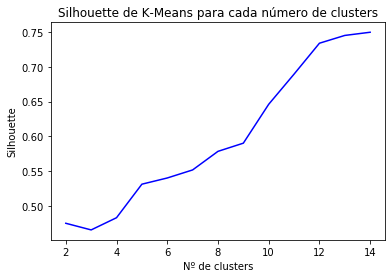

In [10]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

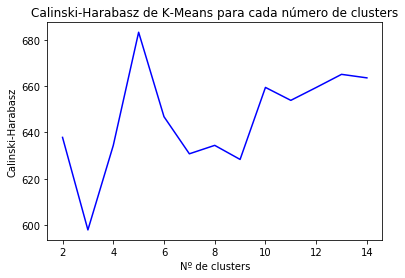

In [11]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [12]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.4755151052183167, 0.46599969633063965, 0.483489086733339, 0.531569055229591, 0.5404576589330073, 0.5519986909803549, 0.5786471085948179, 0.5903779353773022, 0.6461326222918197, 0.6893747693555886, 0.7336714808160643, 0.7448415168530551, 0.749410469848095]

Calinski-Harabasz: 
[637.8831140088855, 597.9798532808658, 634.4016355078425, 683.2263367508311, 646.8004817570682, 630.8036708742871, 634.4445453990445, 628.3756258948337, 659.4342926638305, 653.852874658656, 659.3965542394021, 665.0690582901761, 663.5502144820157]


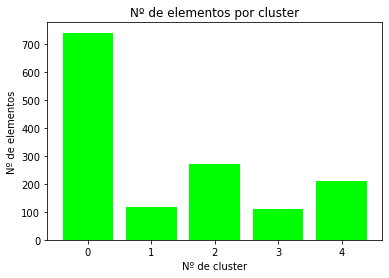

In [13]:
results5 = KMeans(n_clusters=5, random_state=0).fit(caso1_norm)

# Número de elementos por cluster
m = [0 for i in range(5)]

for i in range(len(caso1)):
    m[results5.labels_[i]]+=1
    
graf_barras(range(5), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")

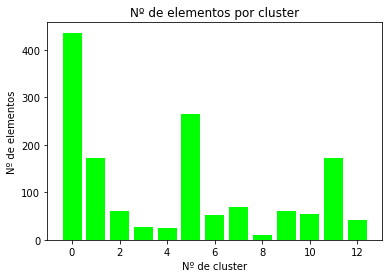

In [14]:
results13 = KMeans(n_clusters=13, random_state=0).fit(caso1_norm)

# Número de elementos por cluster
m = [0 for i in range(13)]

for i in range(len(caso1)):
    m[results13.labels_[i]]+=1
    
graf_barras(range(13), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")

Elegimos usar 5 clusters.

In [15]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results5.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.531569
calinsky: 683.226337


Visualizamos los centroides.

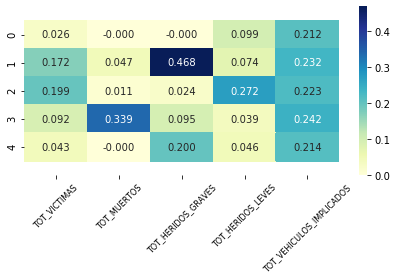

In [16]:
centroids = results5.cluster_centers_
visualize_centroids(centroids, caso1_norm, atributos)

Visualizamos otras gráficas

In [17]:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']
print(Counter(caso1['TOT_VICTIMAS']))
print(Counter(caso1['TOT_MUERTOS']))
print(Counter(caso1['TOT_HERIDOS_GRAVES']))
print(Counter(caso1['TOT_HERIDOS_LEVES']))
print(Counter(caso1['TOT_VEHICULOS_IMPLICADOS']))

Counter({1: 587, 2: 432, 3: 236, 4: 91, 5: 52, 6: 28, 7: 14, 9: 3, 8: 2, 10: 2, 16: 1})
Counter({0: 1306, 1: 111, 2: 23, 3: 7, 4: 1})
Counter({0: 1045, 1: 278, 2: 97, 3: 19, 4: 5, 5: 4})
Counter({1: 581, 2: 355, 0: 227, 3: 163, 4: 64, 5: 33, 6: 11, 7: 9, 8: 3, 9: 1, 14: 1})
Counter({2: 1331, 3: 98, 4: 12, 5: 3, 1: 3, 6: 1})


In [18]:
# pairplot(caso1, atributos, results5.labels_)

Visualizamos los diagramas de cajas:

In [19]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso1)
datos_bp['Cluster'] = results5.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
75,2,0,0,2,2,0
132,3,0,0,3,2,2
139,1,0,0,1,2,0
146,3,0,2,1,2,1
150,2,0,0,2,2,0


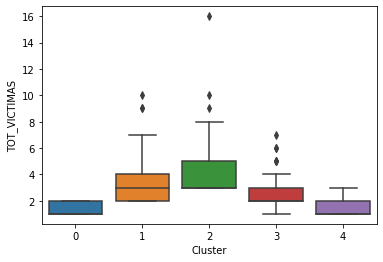

In [20]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

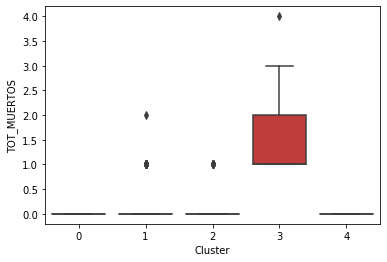

In [21]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

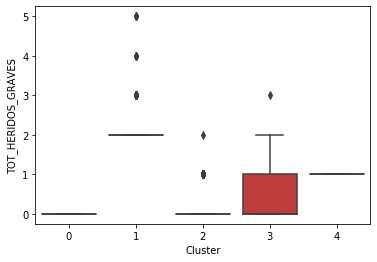

In [22]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

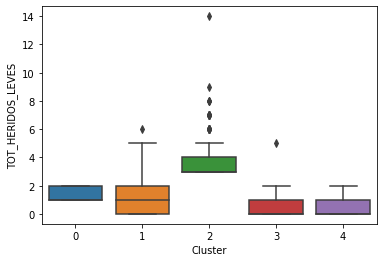

In [23]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

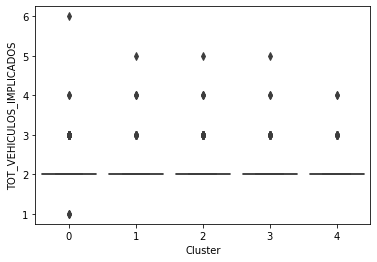

In [24]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')

#### DBSCAN

In [25]:
datos.iloc[0]

MES                                                                         8
HORA                                                                       14
DIASEMANA                                                                   3
PROVINCIA                                                             Bizkaia
COMUNIDAD_AUTONOMA                                                 País Vasco
ISLA                                                               NO_ES_ISLA
TOT_VICTIMAS                                                                3
TOT_VICTIMAS30D                                                             3
TOT_MUERTOS                                                                 0
TOT_MUERTOS30D                                                       0.054104
TOT_HERIDOS_GRAVES                                                          3
TOT_HERIDOS_GRAVES30D                                                  2.9459
TOT_HERIDOS_LEVES                                               

In [26]:
datos

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
0,8,14.0,3,Bizkaia,País Vasco,NO_ES_ISLA,3,3,0,0.054104,...,NINGUNA (SOLO NORMA),MOJADA,PLENO DÍA,LLUVIA FUERTE,FACTORES ATMOSFÉRICOS,OTRA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
1,6,18.0,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,SEMÁFORO,MOJADA,PLENO DÍA,LLOVIZNANDO,OTRA_CAUSA,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA
2,11,17.0,2,Tarragona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,SEÑAL DE STOP,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),NaN,NaN
3,1,9.0,3,Lleida,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,NaN,MOJADA,PLENO DÍA,LLOVIZNANDO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Múltiple o en...,NaN,NINGUNA MEDIDA
4,11,22.0,7,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,NaN,MOJADA,NOCHE: ILUMINACIÓN SUFICIENTE,LLUVIA FUERTE,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89514,6,19.0,5,Melilla,Ceuta y Melilla,NO_ES_ISLA,1,1,0,0.018035,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Atropello a peatón aislado o en grupo,FLUIDA,NINGUNA MEDIDA
89515,4,17.0,4,Melilla,Ceuta y Melilla,NO_ES_ISLA,1,1,0,0.000000,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Colisión de vehículos en marcha (Lateral),FLUIDA,NINGUNA MEDIDA
89516,1,23.0,5,Melilla,Ceuta y Melilla,NO_ES_ISLA,1,1,0,0.018035,...,SEÑAL DE CEDA EL PASO,SECA Y LIMPIA,NOCHE: ILUMINACIÓN SUFICIENTE,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Colisión de vehículos en marcha (Frontolateral),FLUIDA,NINGUNA MEDIDA
89517,2,15.0,3,Melilla,Ceuta y Melilla,NO_ES_ISLA,2,2,0,0.000000,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA


## Escenario 2: Verano

### Selección de datos

Estudiaremos los datos que representen accidentes en verano.

In [27]:
# Seleccionamos los datos con los que trabajaremos
caso2 = datos[(datos.MES == 6) | (datos.MES == 7) | (datos.MES == 8) | (datos.MES == 9)]
caso2.head()

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
0,8,14.0,3,Bizkaia,País Vasco,NO_ES_ISLA,3,3,0,0.054104,...,NINGUNA (SOLO NORMA),MOJADA,PLENO DÍA,LLUVIA FUERTE,FACTORES ATMOSFÉRICOS,OTRA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
1,6,18.0,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,SEMÁFORO,MOJADA,PLENO DÍA,LLOVIZNANDO,OTRA_CAUSA,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA
6,8,19.0,3,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,NaN,SECA Y LIMPIA,CREPÚSCULO,VIENTO FUERTE,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),NaN,NINGUNA MEDIDA
9,8,16.0,6,Girona,Cataluña,NO_ES_ISLA,1,1,0,0.000000,...,NaN,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Múltiple o en...,NaN,NaN
11,9,12.0,1,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,NaN,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Lateral),NaN,NaN


In [28]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [29]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso2 = caso2[atributos]
caso2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30580 entries, 0 to 89514
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              30580 non-null  int64
 1   TOT_MUERTOS               30580 non-null  int64
 2   TOT_HERIDOS_GRAVES        30580 non-null  int64
 3   TOT_HERIDOS_LEVES         30580 non-null  int64
 4   TOT_VEHICULOS_IMPLICADOS  30580 non-null  int64
dtypes: int64(5)
memory usage: 1.4 MB


### Normalización de los datos

In [30]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso2_norm = scaler.fit_transform(caso2)
caso2_norm[:5]

array([[0.03921569, 0.        , 0.3       , 0.        , 0.22222222],
       [0.        , 0.        , 0.        , 0.0212766 , 0.33333333],
       [0.01960784, 0.        , 0.        , 0.04255319, 0.22222222],
       [0.        , 0.        , 0.        , 0.0212766 , 0.33333333],
       [0.01960784, 0.        , 0.        , 0.04255319, 0.22222222]])

### Algoritmos de clustering

#### K-Means

In [34]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso2_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

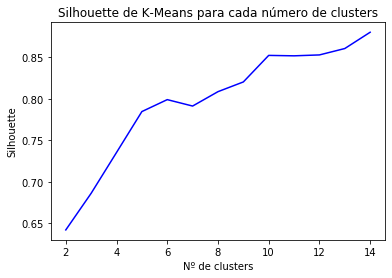

In [35]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

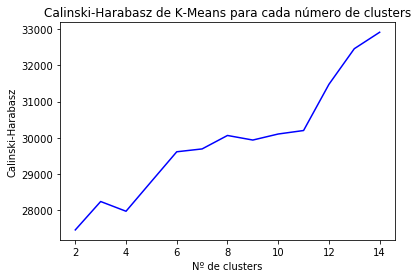

In [36]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [37]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.6420431124021558, 0.6862249142272087, 0.7354111890905589, 0.7847491954920559, 0.7991431130901165, 0.791398470344001, 0.8087467631347481, 0.8204679027395508, 0.852476293804462, 0.8519611125582583, 0.8530502926582869, 0.8607566467006114, 0.8803947959481695]

Calinski-Harabasz: 
[27462.369314689648, 28244.78011059668, 27976.629002373404, 28797.329233325265, 29615.18214167696, 29693.77002508316, 30064.335054597334, 29938.288986514963, 30104.648178326297, 30200.559006512103, 31473.276979640512, 32454.719546274482, 32908.32190346406]


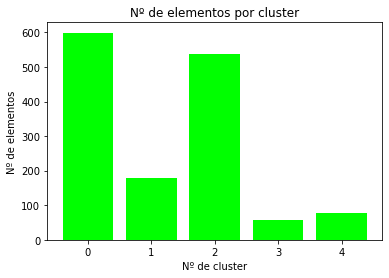

In [43]:
results5 = KMeans(n_clusters=5, random_state=0).fit(caso2_norm)

# Número de elementos por cluster
m = [0 for i in range(5)]

for i in range(len(caso1)):
    m[results5.labels_[i]]+=1
    
graf_barras(range(5), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")

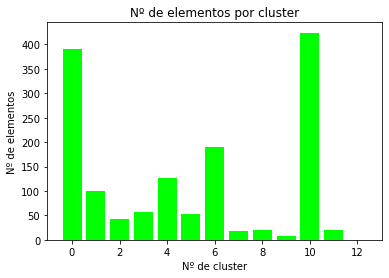

In [44]:
results13 = KMeans(n_clusters=13, random_state=0).fit(caso2_norm)

# Número de elementos por cluster
m = [0 for i in range(13)]

for i in range(len(caso1)):
    m[results13.labels_[i]]+=1
    
graf_barras(range(13), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")

Elegimos usar --- clusters.

In [42]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results5.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

ValueError: Found input variables with inconsistent numbers of samples: [30580, 1448]

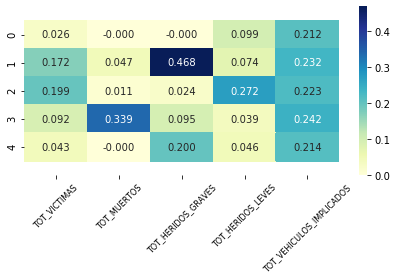

In [41]:
centroids = results5.cluster_centers_
visualize_centroids(centroids, caso1_norm, atributos)

In [ ]:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']
print(Counter(caso1['TOT_VICTIMAS']))
print(Counter(caso1['TOT_MUERTOS']))
print(Counter(caso1['TOT_HERIDOS_GRAVES']))
print(Counter(caso1['TOT_HERIDOS_LEVES']))
print(Counter(caso1['TOT_VEHICULOS_IMPLICADOS']))

In [ ]:
# pairplot(caso1, atributos, results5.labels_)

In [ ]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso1)
datos_bp['Cluster'] = results5.labels_
datos_bp.head()

In [ ]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

In [ ]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

In [ ]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

In [ ]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

In [ ]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')